# Prediction performance of MTL and STL models

Show results for MTL and STL models.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
# Get the parent directory of the notebook directory
project_dir = os.path.dirname(notebook_dir)
# import the module using a relative path
sys.path.append(project_dir)
import definitions
from scripts.mtl_results_utils import (
    plot_mtl_results_map,
    plot_multi_metrics_for_stl_mtl,
    plot_multi_single_comp_flow_boxes,
    read_multi_single_exps_results,
)
from hydromtl.utils import hydro_utils
from hydromtl.visual.plot_stat import plot_scatter_with_11line, plot_ts

Please Check your directory:
ROOT_DIR of the repo:  /mnt/sdc/owen/code/HydroMTL
DATA_SOURCE_DIR of the repo:  /mnt/data/owen411/data
RESULT_DIR of the repo:  /mnt/sdc/owen/code/HydroMTL/results


/mnt/data/owen411/program/miniconda3/envs/MTL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read results

In [2]:
# MTL exps with different λ: 2, 1, 1/3, 1/8, 1/24
mtl_q_et_valid_exps = ["expmtl002", "expmtl001", "expmtl003", "expmtl004", "expmtl005"]
mtl_q_et_test_exps = [f"{tmp}0" for tmp in mtl_q_et_valid_exps]
# index 0 is STL-Q, index 1-5 are MTL-Q
exps_q_et_valid = ["expstlq001"] + mtl_q_et_valid_exps
exps_q_et_test = ["expstlq0010"] + mtl_q_et_test_exps

# index 0 is STL-ET, index 1-5 are MTL-Q
exps_et_q_valid = ["expstlet001"] + mtl_q_et_valid_exps
exps_et_q_test = ["expstlet0010"] + mtl_q_et_test_exps


result_cache_dir = os.path.join(
    definitions.RESULT_DIR,
    "cache",
)
figure_dir = os.path.join(
    definitions.RESULT_DIR,
    "figures",
)
if not os.path.exists(result_cache_dir):
    os.makedirs(result_cache_dir)
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
cases_exps_legends_together = [
    "STL",
    "2",
    "1",
    "1/3",
    "1/8",
    "1/24",
]

exps_test_q_et_results_file = os.path.join(
    result_cache_dir,
    "exps_q_et_test_results.npy",
)
exps_test_et_q_results_file = os.path.join(
    result_cache_dir,
    "exps_et_q_test_results.npy",
)
exps_valid_q_et_results_file = os.path.join(
    result_cache_dir,
    "exps_q_et_valid_results.npy",
)
exps_valid_et_q_results_file = os.path.join(
    result_cache_dir,
    "exps_et_q_valid_results.npy",
)
exps_test_pred_q_file = os.path.join(
    result_cache_dir,
    "exps_q_test_pred.npy",
)
exps_test_obs_q_file = os.path.join(
    result_cache_dir,
    "exps_q_test_obs.npy",
)
exps_test_et_pred_file = os.path.join(
    result_cache_dir,
    "exps_et_test_pred.npy",
)
exps_test_et_obs_file = os.path.join(
    result_cache_dir,
    "exps_et_test_obs.npy",
)

if (
    os.path.exists(exps_test_q_et_results_file)
    and os.path.exists(exps_test_et_q_results_file)
    and os.path.exists(exps_valid_q_et_results_file)
    and os.path.exists(exps_valid_et_q_results_file)
):
    exps_q_et_results = np.load(exps_test_q_et_results_file, allow_pickle=True)
    exps_et_q_results = np.load(exps_test_et_q_results_file, allow_pickle=True)
    q_et_valid_inds = np.load(exps_valid_q_et_results_file, allow_pickle=True)
    et_q_valid_inds = np.load(exps_valid_et_q_results_file, allow_pickle=True)
    preds_q_lst = np.load(exps_test_pred_q_file, allow_pickle=True)
    obss_q_lst = np.load(exps_test_obs_q_file, allow_pickle=True)
    preds_et_lst = np.load(exps_test_et_pred_file, allow_pickle=True)
    obss_et_lst = np.load(exps_test_et_obs_file, allow_pickle=True)
else:
    et_q_valid_inds, et_q_best_index_valid_best4et = read_multi_single_exps_results(
        exps_et_q_valid,
        var_idx=1,
    )
    q_et_valid_inds, q_et_best_index_valid = read_multi_single_exps_results(
        exps_q_et_valid
    )

    # q when best4q
    (
        exps_q_et_results,
        _,
        preds_q_lst,
        obss_q_lst,
    ) = read_multi_single_exps_results(
        exps_q_et_test, q_et_best_index_valid, return_value=True
    )

    # et when best4q
    exps_et_q_results, _, preds_et_lst, obss_et_lst = read_multi_single_exps_results(
        exps_et_q_test,
        q_et_best_index_valid,
        var_idx=1,
        return_value=True,
    )
    np.save(exps_valid_q_et_results_file, q_et_valid_inds, allow_pickle=True)
    np.save(exps_valid_et_q_results_file, et_q_valid_inds, allow_pickle=True)
    np.save(exps_test_q_et_results_file, exps_q_et_results, allow_pickle=True)
    np.save(exps_test_et_q_results_file, exps_et_q_results, allow_pickle=True)
    np.save(exps_test_pred_q_file, preds_q_lst, allow_pickle=True)
    np.save(exps_test_obs_q_file, obss_q_lst, allow_pickle=True)
    np.save(exps_test_et_pred_file, preds_et_lst, allow_pickle=True)
    np.save(exps_test_et_obs_file, obss_et_lst, allow_pickle=True)

Plot for valid period

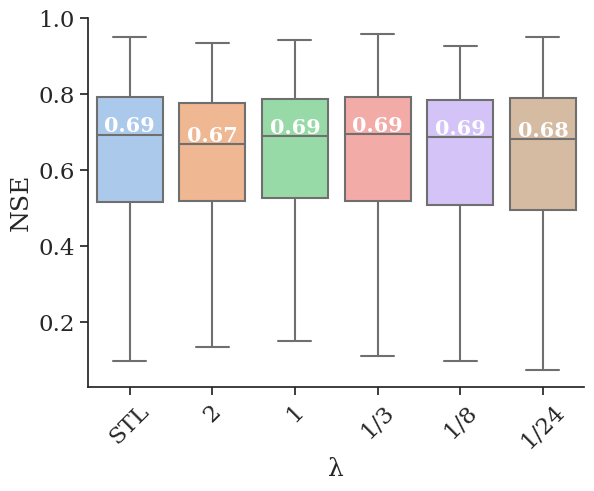

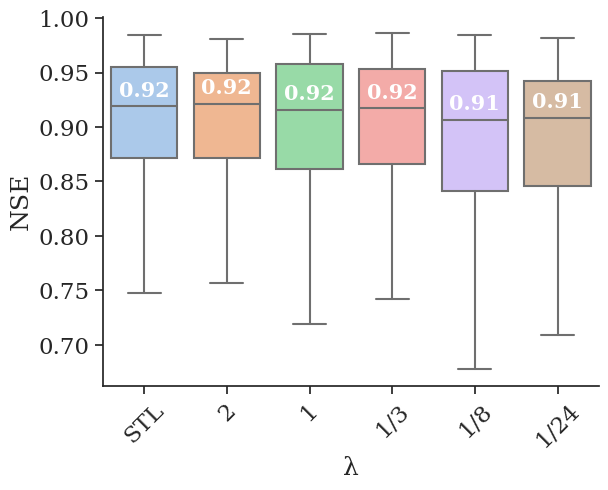

In [3]:
# plot boxes of NSEs for valid Q
plot_multi_single_comp_flow_boxes(
    q_et_valid_inds[:-2],
    cases_exps_legends_together=cases_exps_legends_together,
    save_path=os.path.join(
        figure_dir,
        "mtl_valid_flow_boxes.png",
    ),
    rotation=45,
)

# plot boxes of NSEs for valid ET
plot_multi_single_comp_flow_boxes(
    et_q_valid_inds[:-2],
    cases_exps_legends_together=cases_exps_legends_together,
    save_path=os.path.join(
        figure_dir,
        "mtl_valid_et_boxes.png",
    ),
    rotation=45,
)

Plot for testing period. 1/3 seems best as it didn't change make any variable's prediction worse.

In [4]:
chosen_idx = 3
chosen_mtl4q_test_result = exps_q_et_results[chosen_idx]
chosen_mtl4et_test_result = exps_et_q_results[chosen_idx]

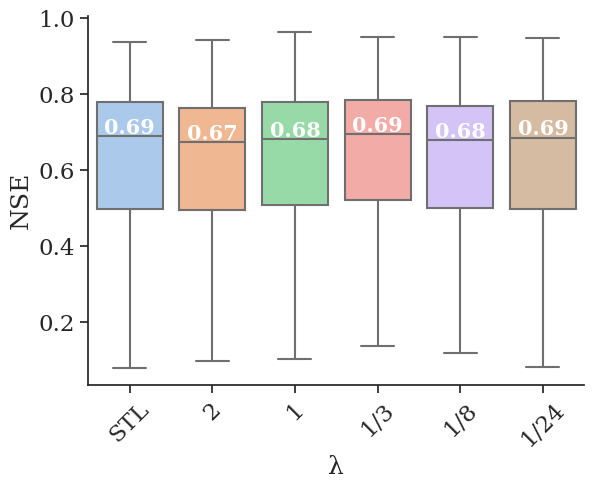

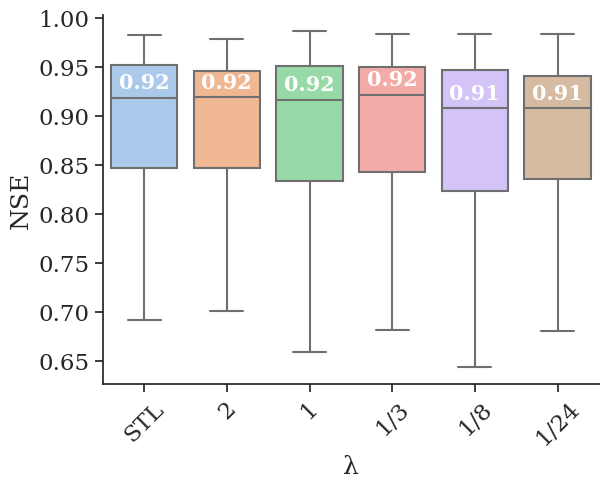

In [5]:
# plot boxes of NSEs for test Q
plot_multi_single_comp_flow_boxes(
    exps_q_et_results[:-2],
    cases_exps_legends_together=cases_exps_legends_together,
    save_path=os.path.join(
        figure_dir,
        "mtl_test_flow_boxes.png",
    ),
    rotation=45,
)

# plot boxes of NSEs for test ET
plot_multi_single_comp_flow_boxes(
    exps_et_q_results[:-2],
    cases_exps_legends_together=cases_exps_legends_together,
    save_path=os.path.join(
        figure_dir,
        "mtl_test_et_boxes.png",
    ),
    rotation=45,
)

Plot all metrics for testing period

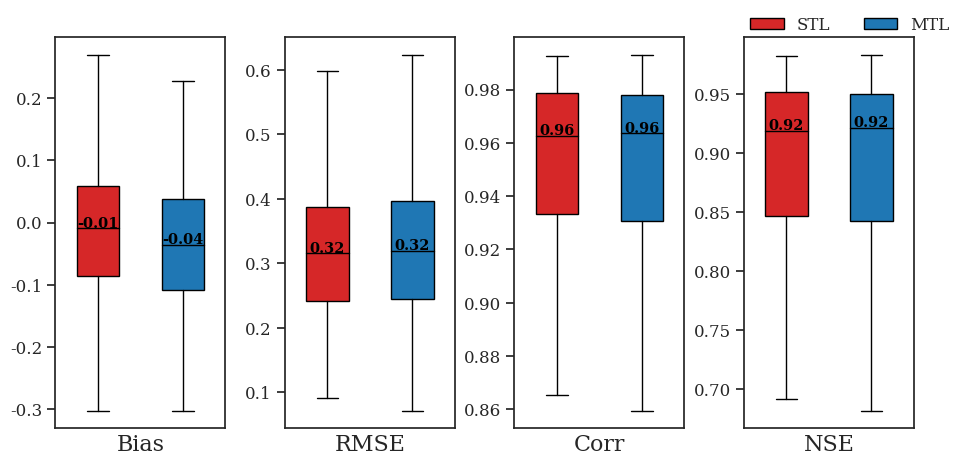

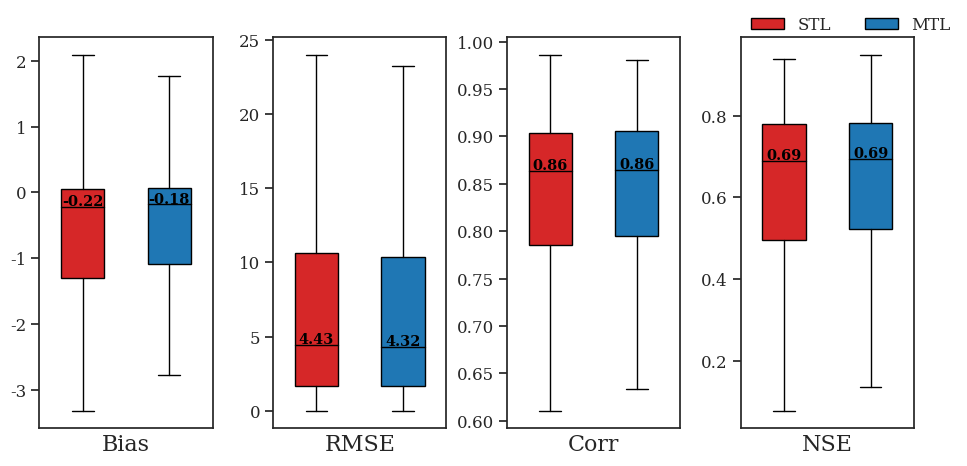

In [6]:
# plot all metrics for stl and mtl exps
# for ET
plot_multi_metrics_for_stl_mtl(
    [exps_et_q_test[0], exps_et_q_test[chosen_idx]], figure_dir, var_obj="et"
)
# for Q
plot_multi_metrics_for_stl_mtl([exps_q_et_test[0], exps_q_et_test[chosen_idx]], figure_dir)

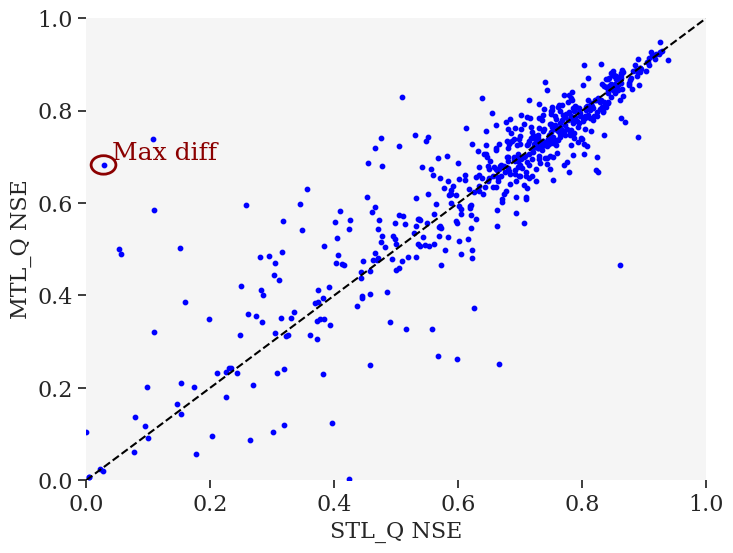

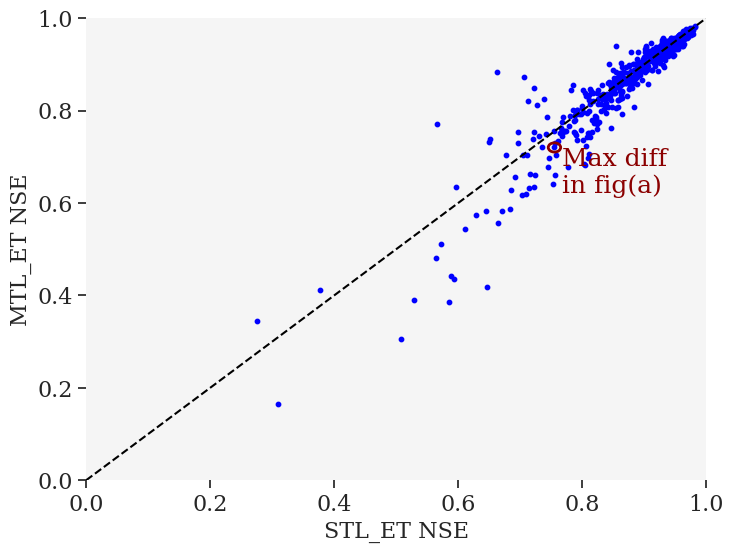

In [41]:
# plot scatter with a 1:1 line to compare single-task and multi-task models
plot_scatter_with_11line(
    exps_q_et_results[0],
    chosen_mtl4q_test_result,
    # xlabel="NSE single-task",
    # ylabel="NSE multi-task",
    xlabel="STL_Q NSE",
    ylabel="MTL_Q NSE",
)

mark_color = "darkred"

# Extract the first and second 1-D arrays
x = exps_q_et_results[0]
y = chosen_mtl4q_test_result
# Filter the data to only include points where both x and y are in the range [0, 1]
mask = (x >= 0) & (x <= 1) & (y >= 0) & (y <= 1)
filtered_x = x[mask]
filtered_y = y[mask]

# Calculate the difference for the filtered data
filtered_diff = np.abs(filtered_x - filtered_y)

# Find the index of the point with the most significant difference in the filtered data
filtered_max_diff_index = np.argmax(filtered_diff)

# Highlight the point with the most significant difference with a red circle
plt.gca().add_artist(
    plt.Circle(
        (filtered_x[filtered_max_diff_index], filtered_y[filtered_max_diff_index]),
        0.02,
        fill=False,
        color=mark_color,
        linewidth=2,
    )
)
# Label the plot
plt.text(
    filtered_x[filtered_max_diff_index],
    filtered_y[filtered_max_diff_index],
    " Max diff",
    verticalalignment="bottom",
    horizontalalignment="left",
    color=mark_color,
    fontsize=18,
)

plt.savefig(
    os.path.join(
        figure_dir,
        "mtl_stl_flow_scatter_plot_with_11line.png",
    ),
    dpi=600,
    bbox_inches="tight",
)

plot_scatter_with_11line(
    exps_et_q_results[0],
    chosen_mtl4et_test_result,
    # xlabel="NSE single-task",
    # ylabel="NSE multi-task",
    xlabel="STL_ET NSE",
    ylabel="MTL_ET NSE",
)
# Get the values of the point with max difference
max_diff_x_value = filtered_x[filtered_max_diff_index]
max_diff_y_value = filtered_y[filtered_max_diff_index]

# Extract the first and second 1-D arrays from the second 2-D array
x2 = exps_et_q_results[0]
y2 = chosen_mtl4et_test_result

# Filter the data to only include points where both x and y are in the range [0, 1]
mask2 = (x2 >= 0) & (x2 <= 1) & (y2 >= 0) & (y2 <= 1)
filtered_x2 = x2[mask2]
filtered_y2 = y2[mask2]

# Find the index of the point with the max difference in the first plot in the second plot
index_in_second_plot = np.where(mask)[0][filtered_max_diff_index]
# Highlight the point with the same index as the point with the max difference in the first plot
plt.gca().add_artist(
    plt.Circle(
        (x2[index_in_second_plot], y2[index_in_second_plot]),
        0.01,
        fill=False,
        color=mark_color,
        linewidth=2,
    )
)

# Label the plot
plt.text(
    x2[index_in_second_plot],
    y2[index_in_second_plot],
    " Max diff \n in fig(a)",
    verticalalignment="top",
    horizontalalignment="left",
    color=mark_color,
    fontsize=18,
)

plt.savefig(
    os.path.join(
        figure_dir,
        "mtl_stl_et_scatter_plot_with_11line.png",
    ),
    dpi=600,
    bbox_inches="tight",
)


Number of basins with better performance from MTL or STL

In [8]:
np.count_nonzero(exps_q_et_results[0] > chosen_mtl4q_test_result)

280

In [9]:
np.count_nonzero(exps_q_et_results[0] < chosen_mtl4q_test_result)

311

The points with significant difference for streamflow prediction:

In [37]:
max_diff_x_value, max_diff_y_value


(0.028038842800068853, 0.6824891006290461)

Choose the point with significant difference of streamflow, then see the ET prediction of this basin.

In [38]:
x2[index_in_second_plot], y2[index_in_second_plot]

(0.7553621292070171, 0.720353783097945)

Plot time-series for some specific basins

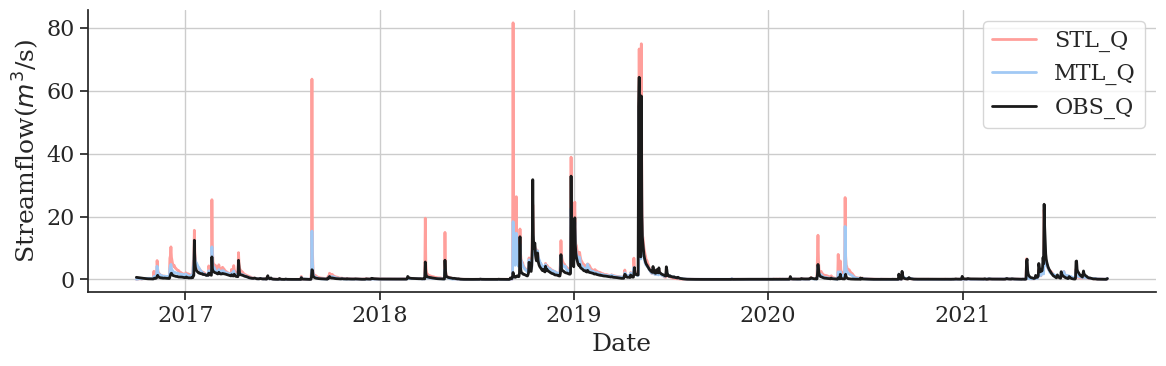

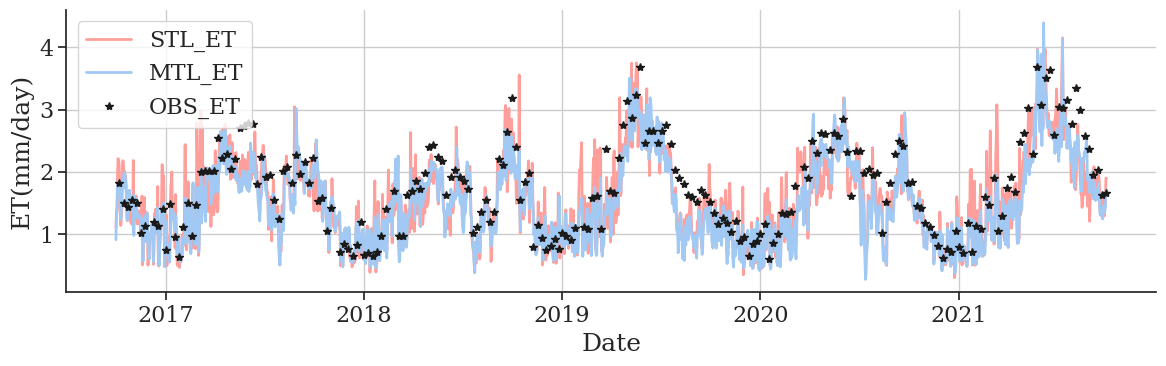

In [17]:
diff_q = chosen_mtl4q_test_result - exps_q_et_results[0]
diff_q_sort = np.argsort(diff_q)
both_positive_q = np.where((chosen_mtl4q_test_result > 0) & (exps_q_et_results[0] > 0))[0]
diff_q_sort_idx = [i for i in diff_q_sort if i in both_positive_q]
gage_id_file = os.path.join(
    definitions.RESULT_DIR,
    "camels_us_mtl_2001_2021_flow_screen.csv",
)
gage_ids = pd.read_csv(gage_id_file)
t_lst = hydro_utils.t_range_days(["2016-10-01", "2021-10-01"])

# plot the 2 better mtl and 1 better stl
plot_ts(
    np.tile(t_lst, (3, 1)).tolist(),
    [
        preds_q_lst[0, diff_q_sort_idx[-1], :],
        preds_q_lst[chosen_idx, diff_q_sort_idx[-1], :],
        obss_q_lst[0, diff_q_sort_idx[-1], :],
    ],
    leg_lst=["STL_Q", "MTL_Q", "OBS_Q"],
    xlabel="Date",
    ylabel="Streamflow($m^3$/s)",
    c_lst=["r", "b", "k"],
)
plt.savefig(
    os.path.join(
        figure_dir,
        "abasin_mtl_stl_flow_ts.png",
    ),
    dpi=600,
)

plot_ts(
    np.tile(t_lst, (3, 1)).tolist(),
    [
        preds_et_lst[0, diff_q_sort_idx[-1], :],
        preds_et_lst[chosen_idx, diff_q_sort_idx[-1], :],
        obss_et_lst[0, diff_q_sort_idx[-1], :],
    ],
    leg_lst=["STL_ET", "MTL_ET", "OBS_ET"],
    xlabel="Date",
    ylabel="ET(mm/day)",
    c_lst=["r", "b", "k"],
)
plt.savefig(
    os.path.join(
        figure_dir,
        "abasin_mtl_stl_et_ts.png",
    ),
    dpi=600,
)

In [18]:
diff_q_sort_idx[-1]

393

In [19]:
chosen_mtl4q_test_result[diff_q_sort_idx[-1]]

0.6824891006290461

In [20]:
exps_q_et_results[0][diff_q_sort_idx[-1]]

0.028038842800068853

Plot maps

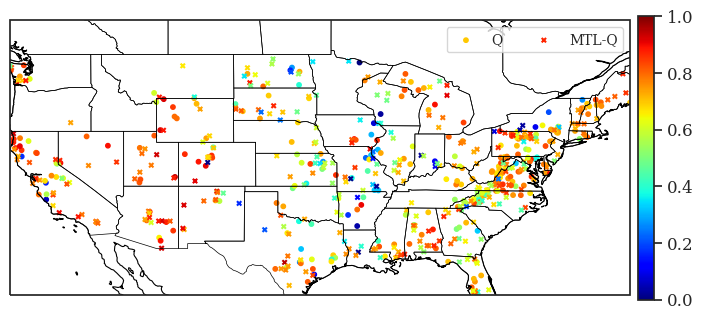

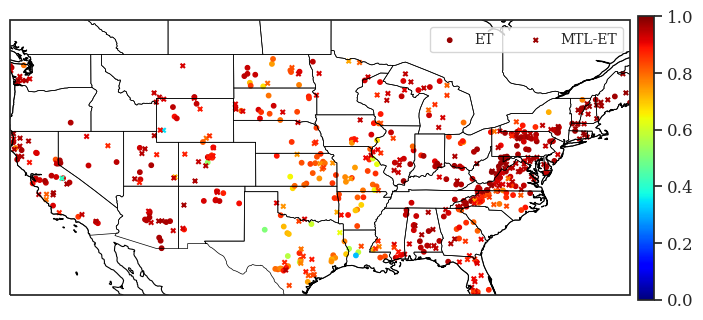

In [21]:
# plot map
plot_mtl_results_map(
    [exps_q_et_results[0], chosen_mtl4q_test_result],
    ["Q", "MTL-Q"],
    ["o", "x"],
    os.path.join(
        figure_dir,
        "better_flow_stl_mtl_cases_map.png",
    ),
)
# plot map
plot_mtl_results_map(
    [exps_et_q_results[0], chosen_mtl4et_test_result],
    ["ET", "MTL-ET"],
    ["o", "x"],
    os.path.join(
        figure_dir,
        "better_et_stl_mtl_cases_map.png",
    ),
)